In [2]:
!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master

The directory '/Users/eric/Library/Caches/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
    100% |████████████████████████████████| 14.2MB 39kB/s 


In [1]:
!jupyter contrib nbextension install --user
!jupyter nbextensions_configurator enable --user

jupyter: 'contrib' is not a Jupyter command
jupyter: 'nbextensions_configurator' is not a Jupyter command


In [143]:
!pwd

/Users/eric/code/detect-relationships


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import loadmat, mat_to_triplets

In [3]:
# Load data
obj_mat   = 'data/vrd/objectListN.mat'
rel_mat   = 'data/vrd/predicate.mat'
train_mat = 'data/vrd/annotation_train.mat'
test_mat = 'data/vrd/annotation_test.mat'

obj_dict = {r:i for i,r in enumerate(loadmat(obj_mat)['objectListN'])}
rel_dict = {r:i for i,r in enumerate(loadmat(rel_mat)['predicate'])}
word2idx = {'obj':obj_dict, 'rel':rel_dict}

obj_dict2 = {i:r for i,r in enumerate(loadmat(obj_mat)['objectListN'])}
rel_dict2 = {i:r for i,r in enumerate(loadmat(rel_mat)['predicate'])}
idx2word = {'obj':obj_dict2, 'rel':rel_dict2}

mat_train = loadmat(train_mat)['annotation_train']
D_train   = mat_to_triplets(mat_train, word2idx)

mat_test = loadmat(test_mat)['annotation_test']
D_test   = mat_to_triplets(mat_test, word2idx)

In [4]:
R_train = [d[0] for d in D_train]
R_test  = [d[0] for d in D_test]

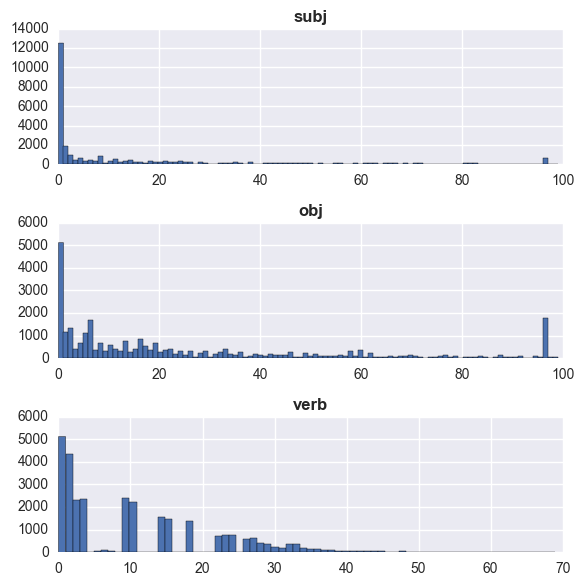

In [5]:
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.figsize'] = [6,6]

i,j,k = zip(*R_train)

plt.subplot(311, title='subj')
plt.hist(i, bins=100)
plt.subplot(312, title='obj')
plt.hist(j, bins=100)
plt.subplot(313, title='verb')
plt.hist(k, bins=70)

plt.tight_layout(); plt.show()

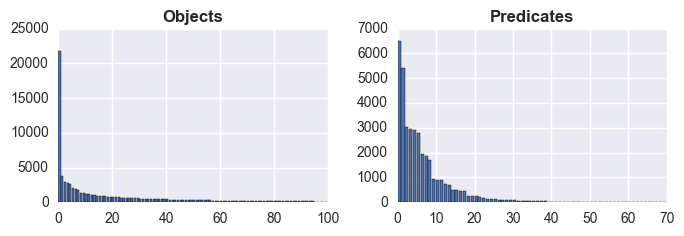

In [23]:
plt.rcParams['figure.figsize'] = [7,2.5]

i,j,k = zip(*(R_test + R_train))

n_i,_,_ = plt.hist(i, bins=100)
n_j,_,_ = plt.hist(j, bins=100)
n_k,_,_ = plt.hist(k, bins=70)

n_i = sorted([sum(i_) for i_ in zip(n_i,n_j)], reverse=True)
n_k = sorted(n_k, reverse=True)

plt.subplot(121, title='Objects')
plt.bar(range(100), n_i)
plt.subplot(122, title='Predicates')
plt.bar(range(70), n_k)

plt.tight_layout(); plt.show()

In [8]:
%qtconsole

In [34]:
for q in [1, 5, 10, 20]:
    print 'Top {}% Subjects: {}'.format(q, sum(n_i[:q]) / sum(n_i))

Top 1% Subjects: 0.411958491188
Top 5% Subjects: 0.556580464503
Top 10% Subjects: 0.638346236205
Top 20% Subjects: 0.739779278537


In [35]:
for q in [1, 5, 10, 20]:
    print 'Top {}% Objects: {}'.format(q, sum(n_j[:q]) / sum(n_i))

Top 1% Objects: 0.168374238182
Top 5% Objects: 0.364783396475
Top 10% Objects: 0.500411793774
Top 20% Objects: 0.652676659529


In [36]:
for q in [1, 5, 10, 20]:
    print 'Top {}% Predicates: {}'.format(q, sum(n_k[:q]) / sum(n_i))

Top 1% Predicates: 0.168440125185
Top 5% Predicates: 0.545379673859
Top 10% Predicates: 0.78886509636
Top 20% Predicates: 0.941129962115


# Testing Data

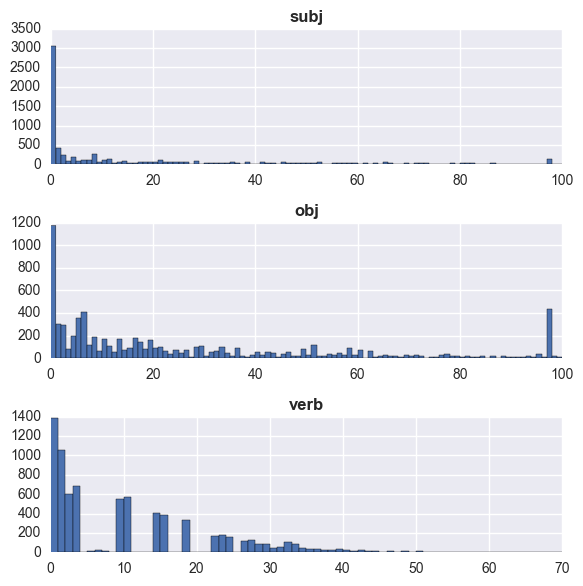

In [81]:
i,j,k = zip(*R_test)

plt.subplot(311, title='subj')
sorted(n_i), range(100), _ = plt.hist(i, range=(0,100), bins=100)
#n_i, b_i, _ = plt.hist(i, range=(0,100), bins=100)

plt.subplot(312, title='obj')
sorted(n_j), range(100), _ = plt.hist(i, range=(0,100), bins=100);
plt.bar()
#n_j, b_j, _ = plt.hist(j, range=(0,100), bins=100)

plt.subplot(313, title='verb')
sorted(n_k), range(70), _ = plt.hist(i, range=(0,70), bins=70)
#n_k, b_k, _ = plt.hist(k, range=(0,70), bins=70)

plt.tight_layout(); plt.show()

In [ ]:
n_i = sorted(n_i, reverse=True)
n_j = sorted(n_j, reverse=True)
n_k = sorted(n_k, reverse=True)

In [87]:
i_test,j_test,k_test = zip(*R_test)
n_i_test, b_i_test, _ = plt.hist(i_test, range=(0,100), bins=100)
n_j_test, b_j_test, _ = plt.hist(j_test, range=(0,100), bins=100)
n_k_test, b_k_test, _ = plt.hist(k_test, range=(0,70), bins=70)

i_train,j_train,k_train = zip(*R_train)
n_i_train, b_i_train, _ = plt.hist(i_train, range=(0,100), bins=100)
n_j_train, b_j_train, _ = plt.hist(j_train, range=(0,100), bins=100)
n_k_train, b_k_train, _ = plt.hist(k_train, range=(0,70), bins=70)



n_i = zip(*sorted(zip(n_i_train, n_i_test), key=lambda x: -x[0]))[1]
n_j = zip(*sorted(zip(n_j_train, n_j_test), key=lambda x: -x[0]))[1]
n_k = zip(*sorted(zip(n_k_train, n_k_test), key=lambda x: -x[0]))[1]

print '\n'
for q in [1, 5, 10, 20]:
    print 'Top {}% Subjects: {}'.format(q, sum(n_i[:q]) / sum(n_i))

print '\n'
for q in [1, 5, 10, 20]:
    print 'Top {}% Objects: {}'.format(q, sum(n_j[:q]) / sum(n_i))
    
print '\n'
for q in [1, 5, 10, 20]:
    print 'Top {}% Predicates: {}'.format(q, sum(n_k[:q]) / sum(n_i))
    
    
    
# TODO: how to do confusion matrix of ranked guesses???
# +1 for each in top [1,5,10,20]
# OR scaled number of points by rank



Top 1% Subjects: 0.399319193506
Top 5% Subjects: 0.545299816706
Top 10% Subjects: 0.615475255302
Top 20% Subjects: 0.720738413197


Top 1% Objects: 0.153574234093
Top 5% Objects: 0.342759884787
Top 10% Objects: 0.486122021472
Top 20% Objects: 0.63092432574


Top 1% Predicates: 0.18133019115
Top 5% Predicates: 0.560617962817
Top 10% Predicates: 0.806231997905
Top 20% Predicates: 0.93977481016


In [105]:
predictions

(0.0, 1.0, 9.0, 3.0, 2.0, 10.0, 14.0, 15.0, 18.0, 23.0)

In [107]:
predictions

(0.0, 1.0, 3.0, 2.0, 10.0, 9.0, 14.0, 15.0, 18.0, 23.0)

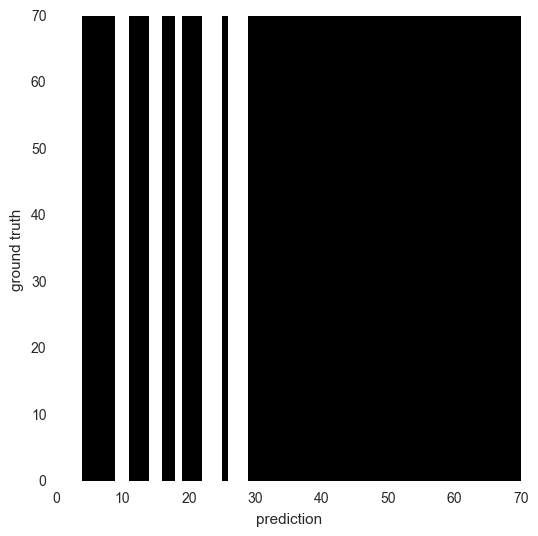

In [134]:
# CONFUSION MATRIX 1:
#   +1 for each in top  q = [1,5,10,20]

q = 15
predictions = zip(*sorted(zip(n_k_train, b_k_train), key=lambda x: -x[0]))[1][:q]

plot_matrix = np.vstack([[(1 if k in predictions else 0) for k in range(70)] for _ in range(70)])
plt.pcolor(plot_matrix, cmap='gray'); plt.show()
plt.ylabel('ground truth')
plt.xlabel('prediction')

In [135]:
from collections import Counter
d = dict(Counter(k_train))

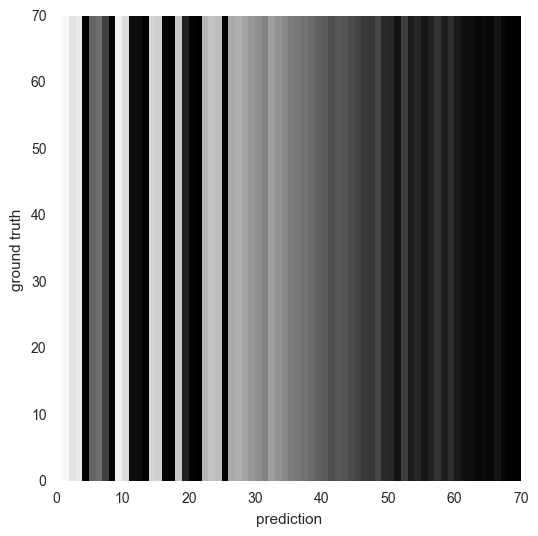

In [144]:
# CONFUSION 2:
#    scaled number of points by rank

q = 70
predictions = zip(*sorted(zip(n_k_train, b_k_train), key=lambda x: -x[0]))[1][:q]

def idx2val(idx):
    rank = predictions.index(idx) if idx in predictions else q
    return (q - rank)**2

plot_matrix = np.vstack([[idx2val(k) for k in range(70)] for _ in range(70)])
plt.pcolor(plot_matrix, cmap='gray'); plt.show()
plt.ylabel('ground truth')
plt.xlabel('prediction')

In [39]:
for q in [1, 5, 10, 20]:
    print 'Top {}% Subjects: {}'.format(q, sum(n_i[:q]) / sum(n_i))

Top 1% Subjects: 0.399319193506
Top 5% Subjects: 0.545299816706
Top 10% Subjects: 0.62385441215
Top 20% Subjects: 0.724535218644


In [40]:
for q in [1, 5, 10, 20]:
    print 'Top {}% Objects: {}'.format(q, sum(n_j[:q]) / sum(n_i))

Top 1% Objects: 0.153574234093
Top 5% Objects: 0.351008117308
Top 10% Objects: 0.486122021472
Top 20% Objects: 0.6459806232


In [41]:
for q in [1, 5, 10, 20]:
    print 'Top {}% Predicates: {}'.format(q, sum(n_k[:q]) / sum(n_i))

Top 1% Predicates: 0.18133019115
Top 5% Predicates: 0.563236449332
Top 10% Predicates: 0.806231997905
Top 20% Predicates: 0.941345902069


In [42]:
%qtconsole

In [66]:
def rel2word(R):
    i,j,k = R
    return idx2word['obj'][i] + '  ' + idx2word['rel'][k].replace(' ','-') + '  ' + idx2word['obj'][j]

In [71]:
for s in [rel2word(r) for r in R_test[:20]]:
    print s

person  wear  shirt
person  wear  watch
person  wear  shorts
person  on  grass
person  stand-on  grass
person  in-the-front-of  person
person  in-the-front-of  tree
person  next-to  car
person  wear  shirt
car  behind  tree
car  behind  person
tree  in-the-front-of  car
tree  behind  person
person  wear  shirt
person  wear  shirt
person  stand-next-to  basket
shirt  on  person
tree  in  pot
tree  next-to  cup
pot  next-to  cup
